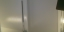

handling cleanup...


KeyboardInterrupt: 

In [1]:
import sys
sys.path.insert(0,'/home/pi/zumi/lib')
import EngineV3 as engine
import picamera
import time
import cv2
from IPython import display
import PIL.Image

# command_number = 0
command = ""

def save_training_data():
    import TrainingDataHelper as data_helper
    data_helper.upload_images_to_cloud()
    data_helper.clear_images_from_zumi()
    clean_up()
    
def clean_up():
    camera.close()
    engine.stop()
    exit()

from picamera import PiCamera
camera = PiCamera()
resolution = 64
camera.resolution = (resolution, resolution)
camera.start_preview()
engine.set_speed(30)

try:
    while True:        
        
        camera.capture("temp.jpg")
        image = cv2.imread("temp.jpg")
        image = cv2.flip(image, 0)
        image = image[32:resolution, 0:resolution]
        display.clear_output(wait=True)
        display.display(PIL.Image.fromarray(image))
        
        command = input("which direction?")           
#         command_number += 1
        
        if command == 'w':
            command = 'up' 
            engine.forward_a_bit()
        elif command == 'a':
            command = 'left'
            engine.left_a_bit()
            
        elif command == 's':
            command = 'right' 
            engine.right_a_bit()
        elif command == 's':
            command = 'stop' 
            engine.stop()
        elif command == ' ':
            print("saving")
            save_training_data()
            break

        file_name = "/home/pi/zumi/sample/deep-learning-demos/tourist/images/" + str(time.time()) + "." + command + ".jpg"
        cv2.imwrite(file_name, image)
        
finally:
    print("handling cleanup...")
    clean_up()


In [ ]:
scp -r pi@june-zumi.local:/home/pi/zumi/sample/deep-learning-demos/tourist/images /home/joonspoon/Desktop/tourist/images